# Multivariate Analysis - Marketing Campaigns

This project looking for understand customer behavior in response to marketing campaigns through multivariate analysis. Using Python and data visualization tools.

- What percentage of customers accepted each campaign?
- What's the success rate across campaigns?
- How do age and income influence spending and campaign response?
- What's the relationship between wine spending, total expenditure, and marketing acceptance?
- Which product category receives the highest customer spending?

**Tools**
- Pandas
- NumPy
- Seaborn
- Matplotlib
- Scikit-learn
- EDA
- Statistical analysis.

**Purpose:**
Deliver insights to help optimize marketing strategies e personalize customer targeting.



### Load and Import

In [1]:
# Imports
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

### Load Data

In [2]:
# Load dataset
df = pd.read_csv("/content/dataset.csv")

# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

## Processing data

In [3]:
# Remove blank spaces
df.columns = df.columns.str.replace(' ', '')

# Remove special caracter
df['Renda'] = df['Renda'].str.replace('$', '').str.replace(',', '').astype(float)

# Transform collumn to datetime
df['Data_Cadastro_Cliente'] = pd.to_datetime(df['Data_Cadastro_Cliente'])

/tmp/ipython-input-3-116922584.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Data_Cadastro_Cliente'] = pd.to_datetime(df['Data_Cadastro_Cliente'])


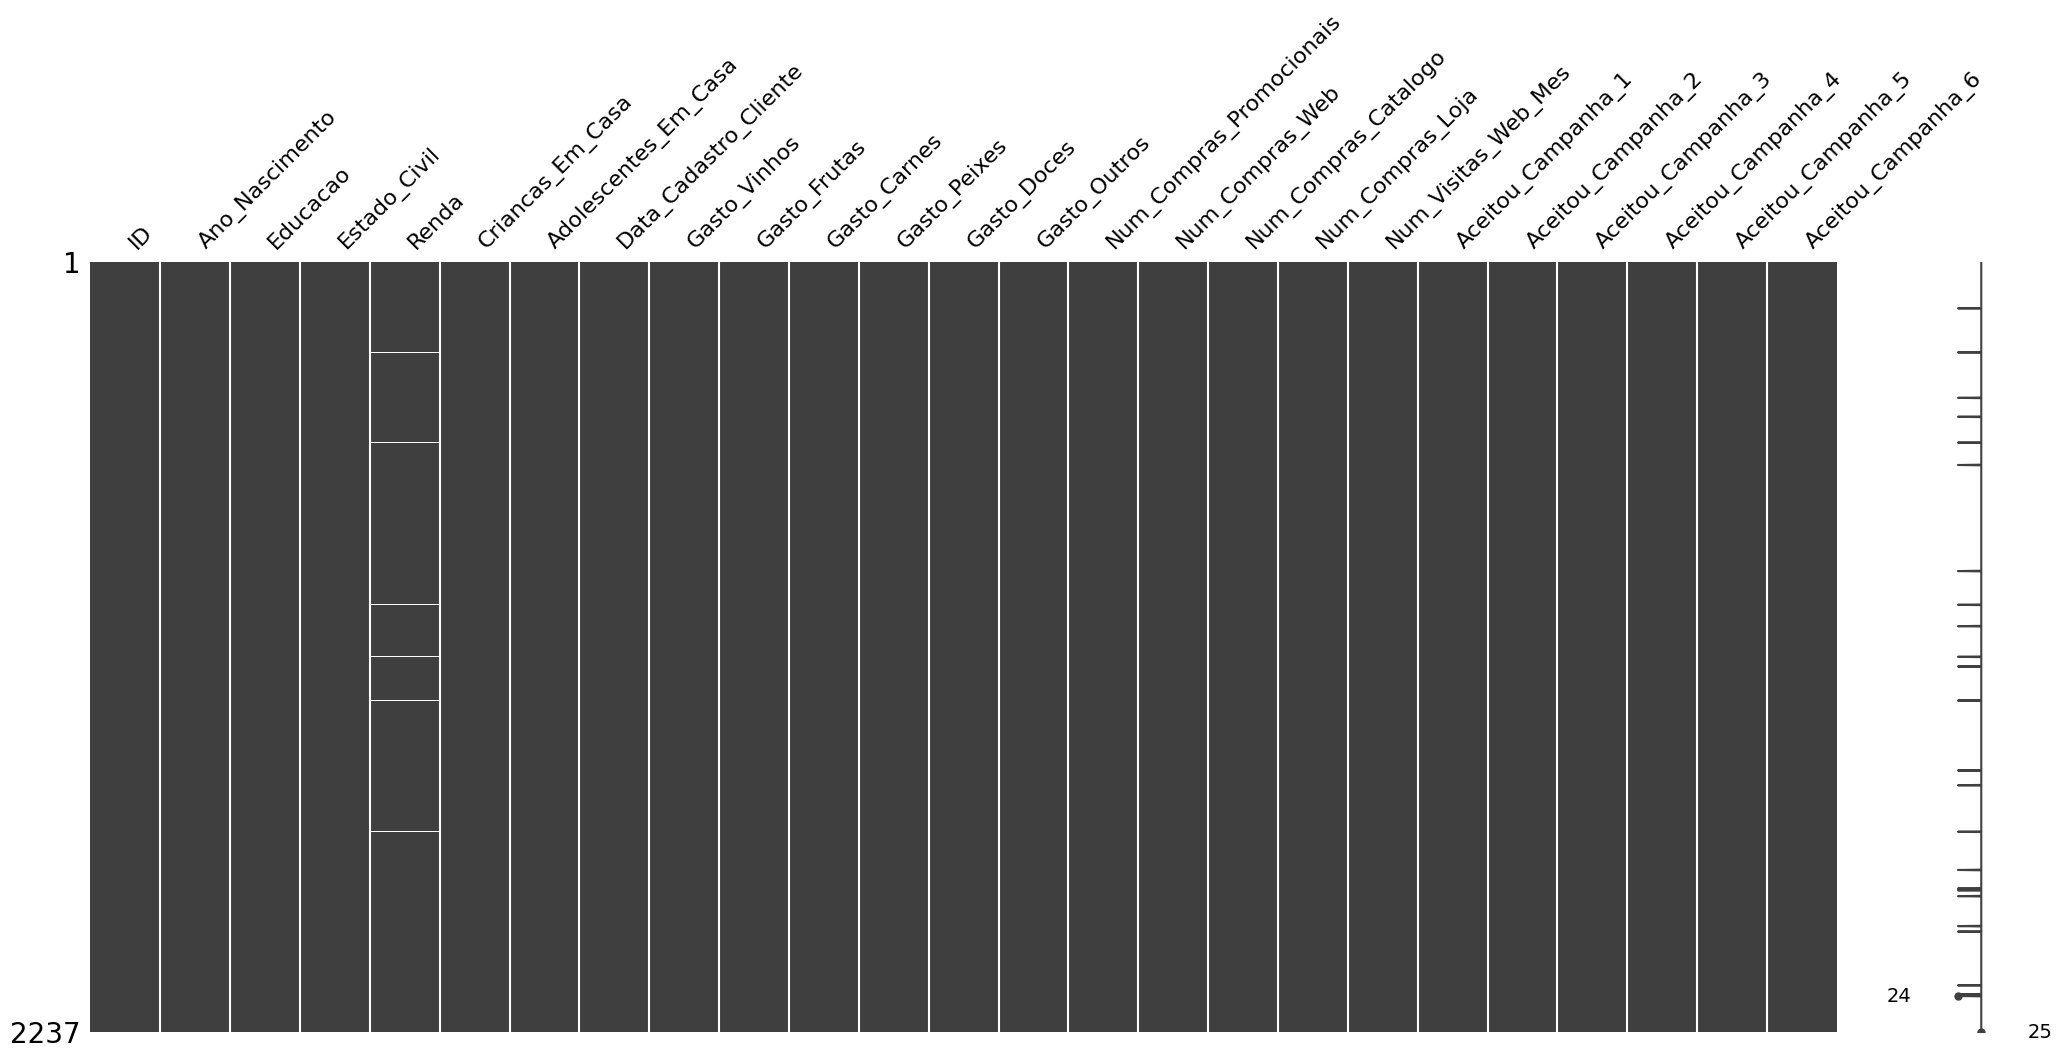

In [4]:
# Matrix of nulls
msno.matrix(df)
plt.show()

In [5]:
# Sum nulls
null_values = df.isnull().sum().sort_values(ascending = False)

# Filter
print(null_values.loc[null_values != 0])

Renda    24
dtype: int64


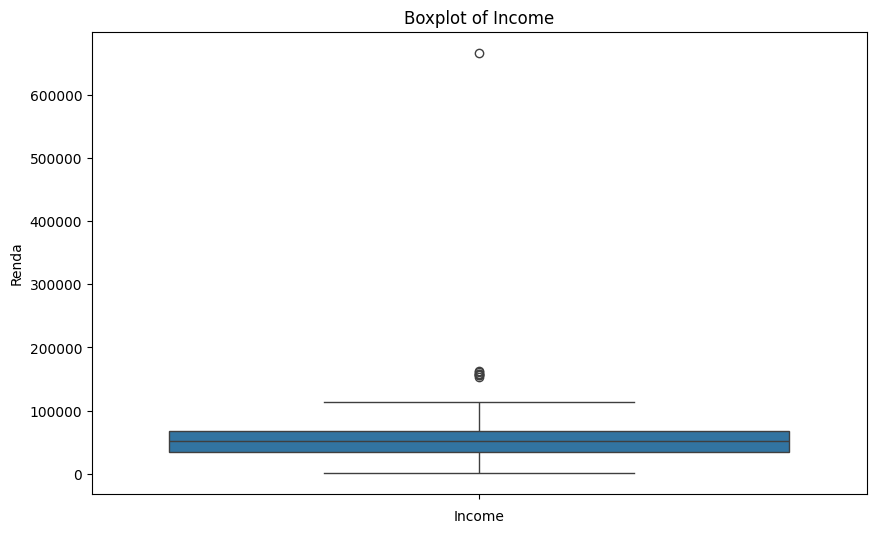

In [6]:
# Visualize outliers in [Renda] with boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(df['Renda'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()

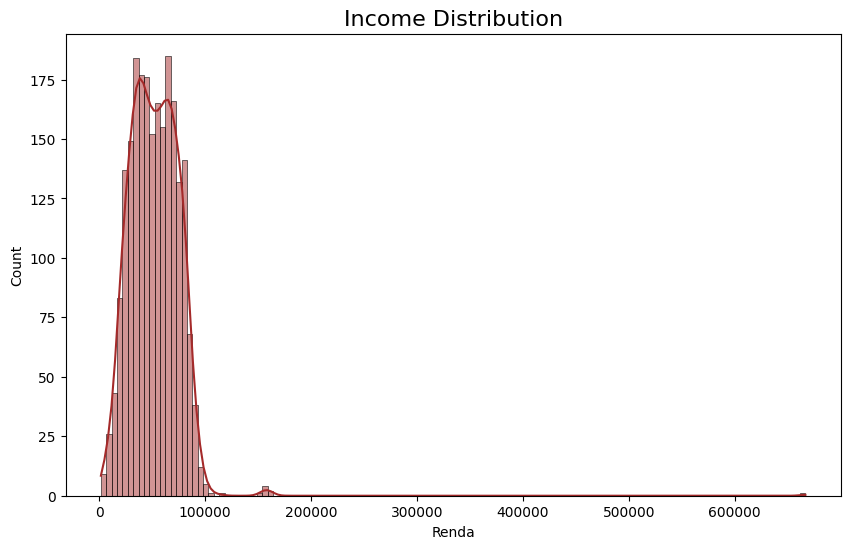

In [7]:
# IQR for [Renda]
Q1 = df['Renda'].quantile(0.25)
Q3 = df['Renda'].quantile(0.75)
IQR = Q3 - Q1

# Define cut-off
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Renda'] < lower_bound) | (df['Renda'] > upper_bound)]

# Define plot size
plt.figure(figsize = (10, 6))

# Distribution plot
sns.histplot(df['Renda'], color = 'brown', kde= True)

# Title plot
plt.title('Income Distribution', size = 16)

# Show Plot
plt.show()

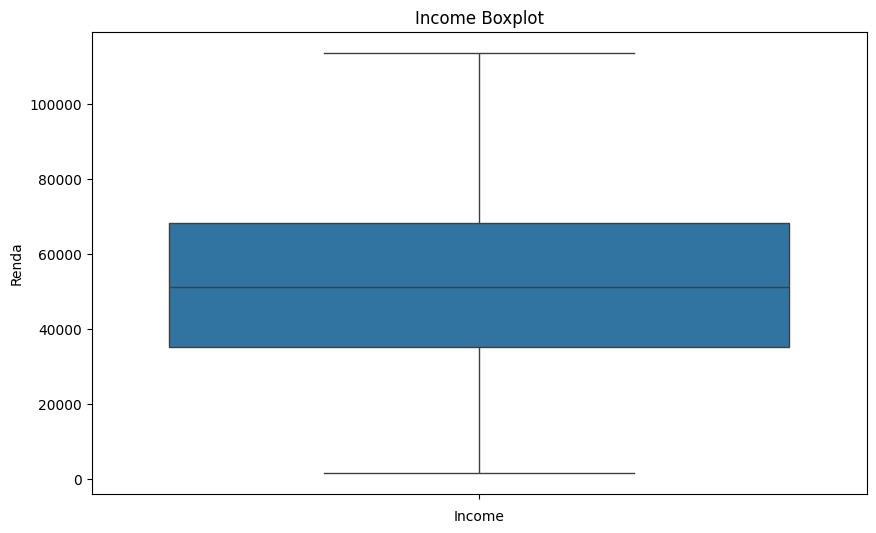

In [8]:
# Remove outliers
df = df[(df['Renda'] >= lower_bound) & (df['Renda'] <= upper_bound)]

# Visualize [Renda] without outliers
plt.figure(figsize = (10, 6))
sns.boxplot(df['Renda'])
plt.title('Income Boxplot')
plt.xlabel('Income')
plt.show()

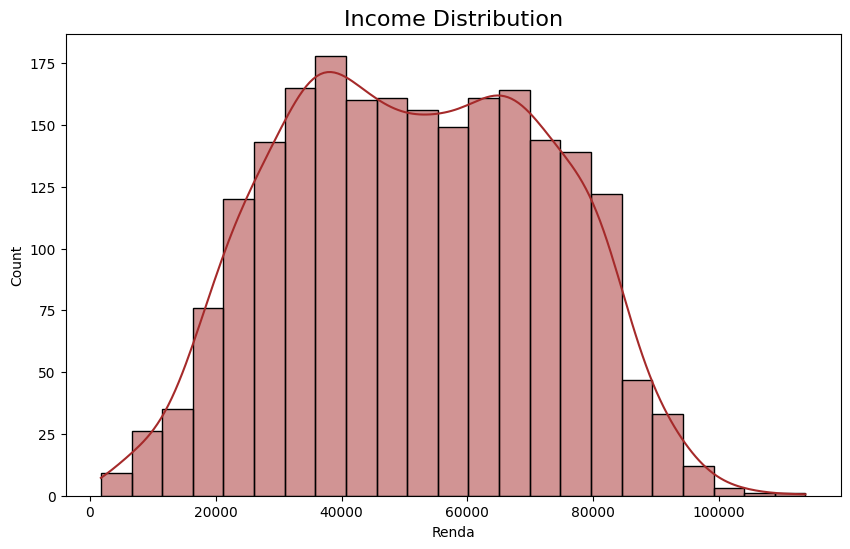

In [9]:
# Plot size
plt.figure(figsize = (10, 6))

# Distribution plot
sns.histplot(df['Renda'], color = 'brown', kde=True)

# Title
plt.title('Income Distribution', size = 16)

# Show
plt.show()

In [10]:
# Normalize before KNNImputer
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Renda']])

# KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Use imputer
data_imputed = imputer.fit_transform(data_scaled)

# Inverso to original
df['Renda'] = scaler.inverse_transform(data_imputed)

print('Total of missing values:', df.isnull().sum().sum())

Total of missing values: 0


### EDA and Atributes

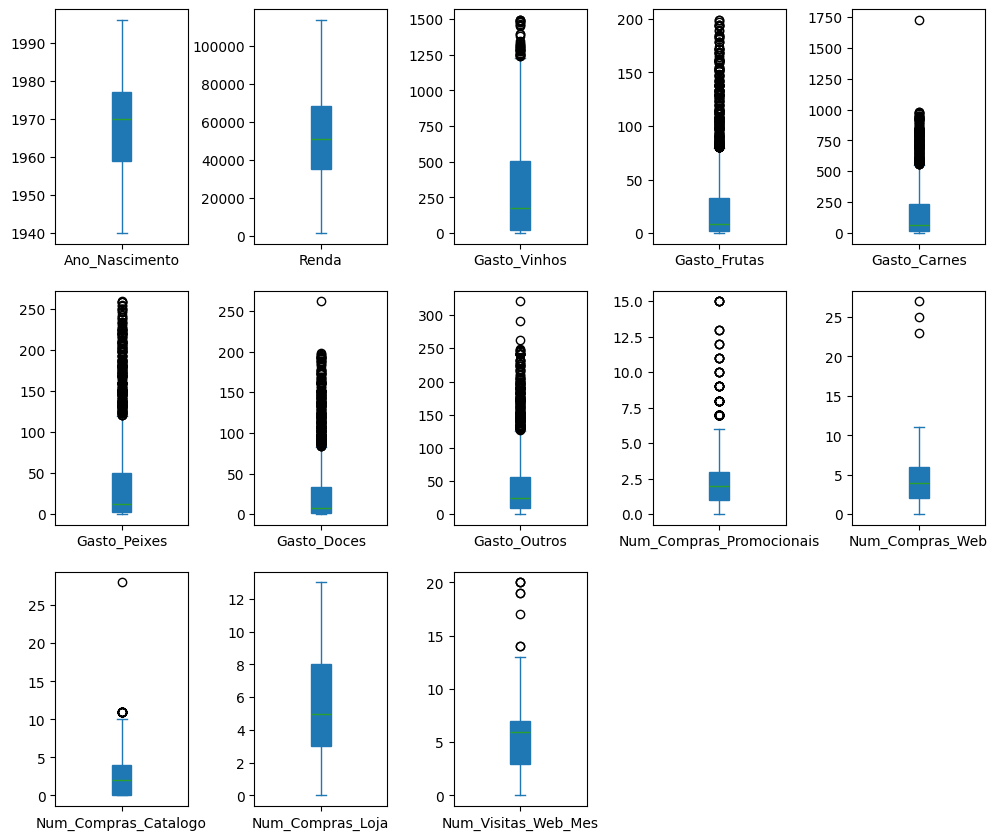

In [11]:
# Drop columns with type category data
data_boxplot = df.drop(columns = ['ID',
                                      'Educacao',
                                      'Estado_Civil',
                                      'Criancas_Em_Casa',
                                      'Data_Cadastro_Cliente',
                                      'Adolescentes_Em_Casa',
                                      'Aceitou_Campanha_1',
                                      'Aceitou_Campanha_2',
                                      'Aceitou_Campanha_3',
                                      'Aceitou_Campanha_4',
                                      'Aceitou_Campanha_5',
                                      'Aceitou_Campanha_6'])

# Plot
data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

In [12]:
# Attribute Age
year = datetime.now().year
df['Idade'] = year - df['Ano_Nascimento']

# Attribute days how client
df['Dias_Como_Cliente'] = df['Data_Cadastro_Cliente'].max() - df['Data_Cadastro_Cliente']

# Remove string 'days'
df['Dias_Como_Cliente'] = df['Dias_Como_Cliente'].astype(str).str.replace(' days', '')

# [Dias_Como_Cliente] to numeric
df['Dias_Como_Cliente'] = pd.to_numeric(df['Dias_Como_Cliente'], downcast = 'integer')

# Total of purchases
df['TotalCompras'] = df['Num_Compras_Web'] + df['Num_Compras_Catalogo'] + df['Num_Compras_Loja']

# Sum where columns with 'Gasto'
df['Gasto_Total'] = df.filter(like = 'Gasto').sum(axis=1)

df['Aceitou_Campanha_1'].value_counts()


,count
Aceitou_Campanha_1,
0,2042
1,163


In [13]:
df['Aceitou_Campanha_2'].value_counts()

,count
Aceitou_Campanha_2,
0,2041
1,164


In [14]:
# Accepted the marketing campaign
df['aceite_campanha'] = df.filter(like = 'Aceitou').sum(axis = 1)

# 1 = Aceppted 0 = Don't Accepted
df['RespostaCampanha'] = df['aceite_campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')

# Drop collumns
df.drop(['Ano_Nascimento', 'Data_Cadastro_Cliente', 'aceite_campanha'], axis = 1, inplace = True)

### What's the Proportion of Customers Who Accepted/Didn't Accept the Marketing Campaign?

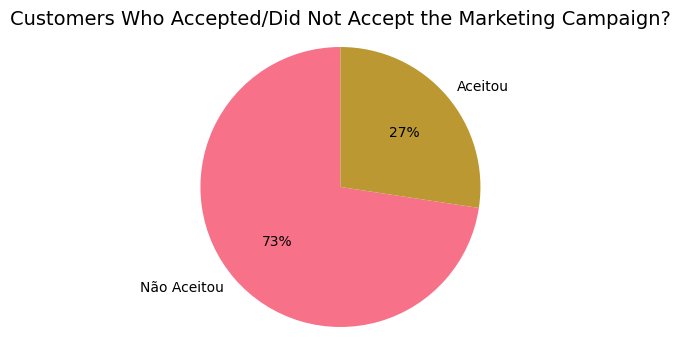

In [15]:
# Plot

# Plot size
fig, ax = plt.subplots(figsize = (6, 4))

# Count [RespostaCampanha]
counts = df['RespostaCampanha'].value_counts()
labels = counts.index.tolist()

# Colors
colors = sns.color_palette('husl')

# Pie chart
ax.pie(counts, labels = labels, colors = colors, autopct = '%.0f%%', startangle = 90)

# Title
ax.set_title('Customers Who Accepted/Did Not Accept the Marketing Campaign?', fontsize = 14)

ax.axis('equal')

# Display
plt.show()

### What is the Success Rate of Each the 6 Campaigns?

/tmp/ipython-input-16-2362792663.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


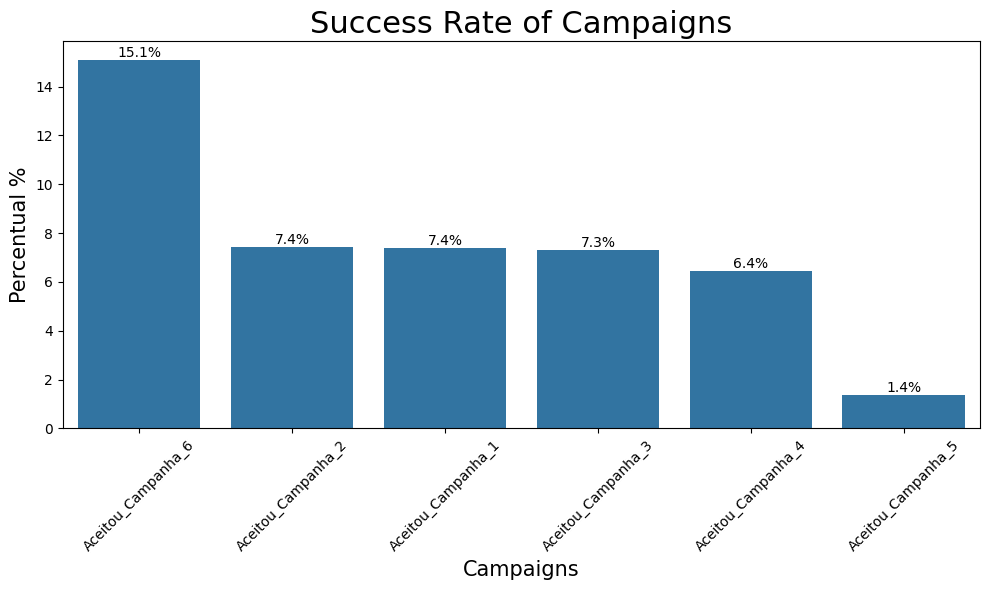

In [16]:
# List campaigns
Campanhas = ['Aceitou_Campanha_1',
             'Aceitou_Campanha_2',
             'Aceitou_Campanha_3',
             'Aceitou_Campanha_4',
             'Aceitou_Campanha_5',
             'Aceitou_Campanha_6']

# Percentual
campaigns = pd.DataFrame(df[Campanhas].mean() * 100, columns = ['Percent']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', y = 'Percent', data = campaigns.sort_values('Percent', ascending = False))

# Labels
plt.xlabel('Campaigns', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Success Rate of Campaigns', size = 22)

# Add percentual in plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2,
                 p.get_height()),
                ha = 'center',
                va = 'bottom')

# Label X
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Display
plt.tight_layout()
plt.show()

### Does age influence customers spending decisions?

In [17]:
# Filter and correlation
df_corr = df.drop(['ID',
                           'Educacao',
                           'Estado_Civil',
                           'Criancas_Em_Casa',
                           'Adolescentes_Em_Casa',
                           'Aceitou_Campanha_1',
                           'Aceitou_Campanha_2',
                           'Aceitou_Campanha_3',
                           'Aceitou_Campanha_4',
                           'Aceitou_Campanha_5',
                           'Aceitou_Campanha_6',
                           'Educacao',
                           'RespostaCampanha'], axis = 1).corr()

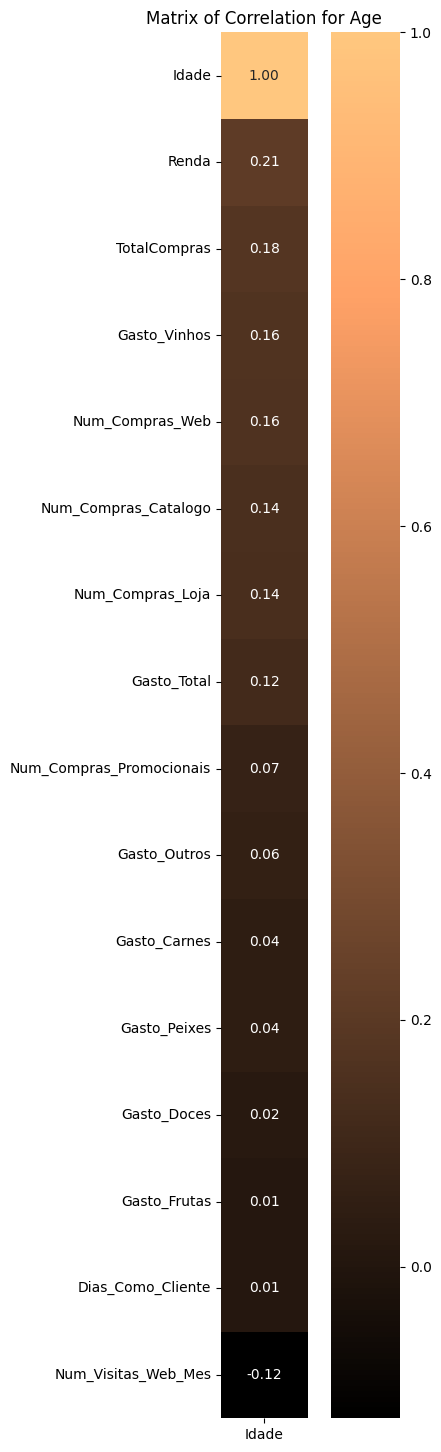

In [18]:
column_corr = df_corr.loc['Idade']
# Plot
plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)),
            annot = True,
            cmap = 'copper',
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matrix of Correlation for Age')
plt.show()

### What's the relationship between total spending and response to marketing campaigns?

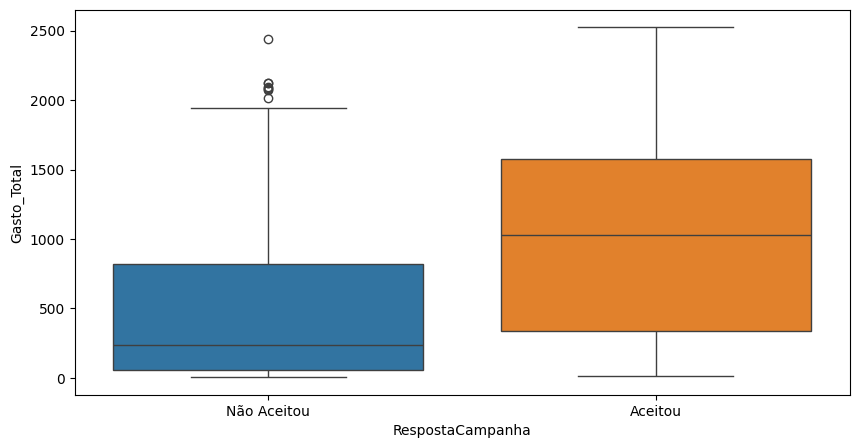

In [19]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Gasto_Total', data = df, hue = 'RespostaCampanha');

### In which product category do customers spend the Most?

/tmp/ipython-input-20-2714868890.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'index',


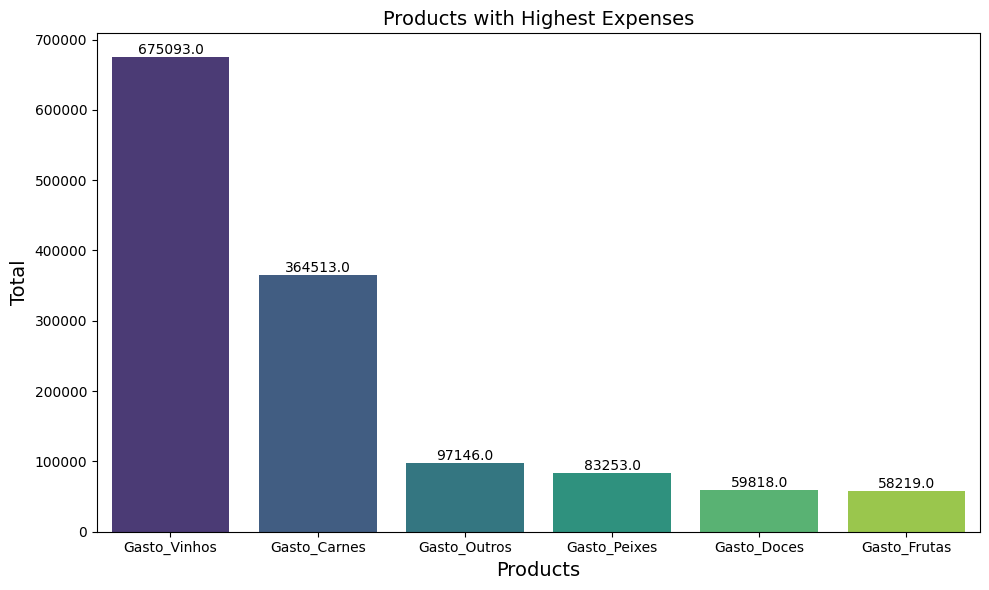

In [20]:
# Product categories
products = ['Gasto_Vinhos',
            'Gasto_Frutas',
            'Gasto_Carnes',
            'Gasto_Peixes',
            'Gasto_Doces',
            'Gasto_Outros']

# Total
df_products = pd.DataFrame(df[products].sum(), columns = ['Sum']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index',
                 y = 'Sum',
                 data = df_products.sort_values('Sum', ascending = False),
                 palette = 'viridis')

# Labels
plt.xlabel('Products', size = 14)
plt.ylabel('Total', size = 14)
plt.title('Products with Highest Expenses', size = 14)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

# Display
plt.tight_layout()
plt.show()

### What's the relationship between wine spending and response to marketing campaigns?

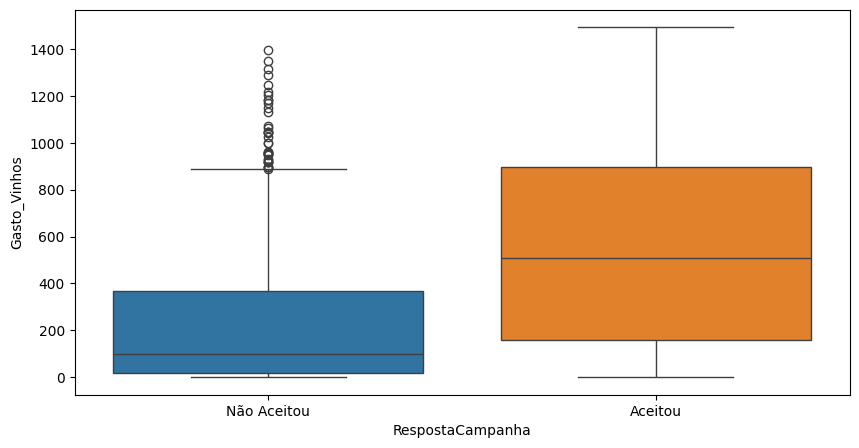

In [21]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Gasto_Vinhos', data = df, hue = 'RespostaCampanha');

### What is the relationship between income and response to marketing campaigns?

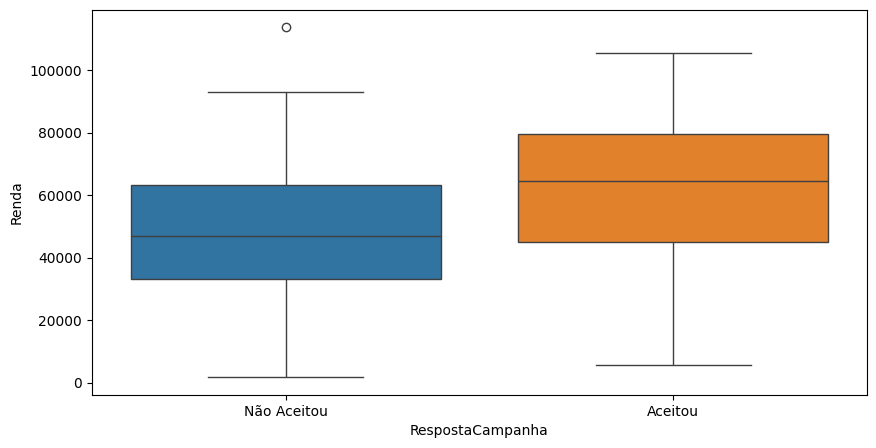

In [22]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Renda', data = df, hue= 'RespostaCampanha');

### What's the relationship between income and total expenditure?

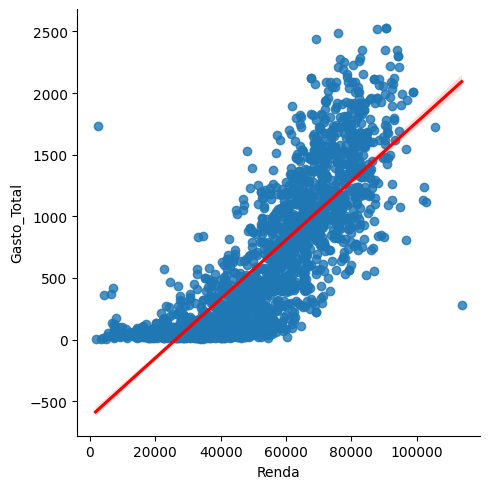

In [23]:
# Plot
sns.lmplot(x = 'Renda', y = 'Gasto_Total', data = df, palette = 'blue', line_kws = {'color': 'red'})

In [24]:
# One-Hot Encoding
df_imp = pd.get_dummies(df, columns = ['Educacao', 'Estado_Civil'])

In [25]:
# Adjust
X = df_imp.drop(['ID',
                     'Gasto_Vinhos',
                     'Gasto_Frutas',
                     'Gasto_Carnes',
                     'Gasto_Peixes',
                     'Gasto_Doces',
                     'Gasto_Outros',
                     'Num_Compras_Web',
                     'Num_Compras_Catalogo',
                     'Num_Compras_Loja',
                     'Aceitou_Campanha_1',
                     'Aceitou_Campanha_2',
                     'Aceitou_Campanha_3',
                     'Aceitou_Campanha_4',
                     'Aceitou_Campanha_5',
                     'Aceitou_Campanha_6',
                     'RespostaCampanha'], axis = 1)


y = df_imp['RespostaCampanha'].map({'Não Aceitou': 0, 'Aceitou': 1})

# Create a model
model_rf = RandomForestClassifier(random_state = 43)

# Train
model = model_rf.fit(X,y)

# Extract importance features
importances = model.feature_importances_

# Std deviation importance features
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)

# index
indices = np.argsort(importances)

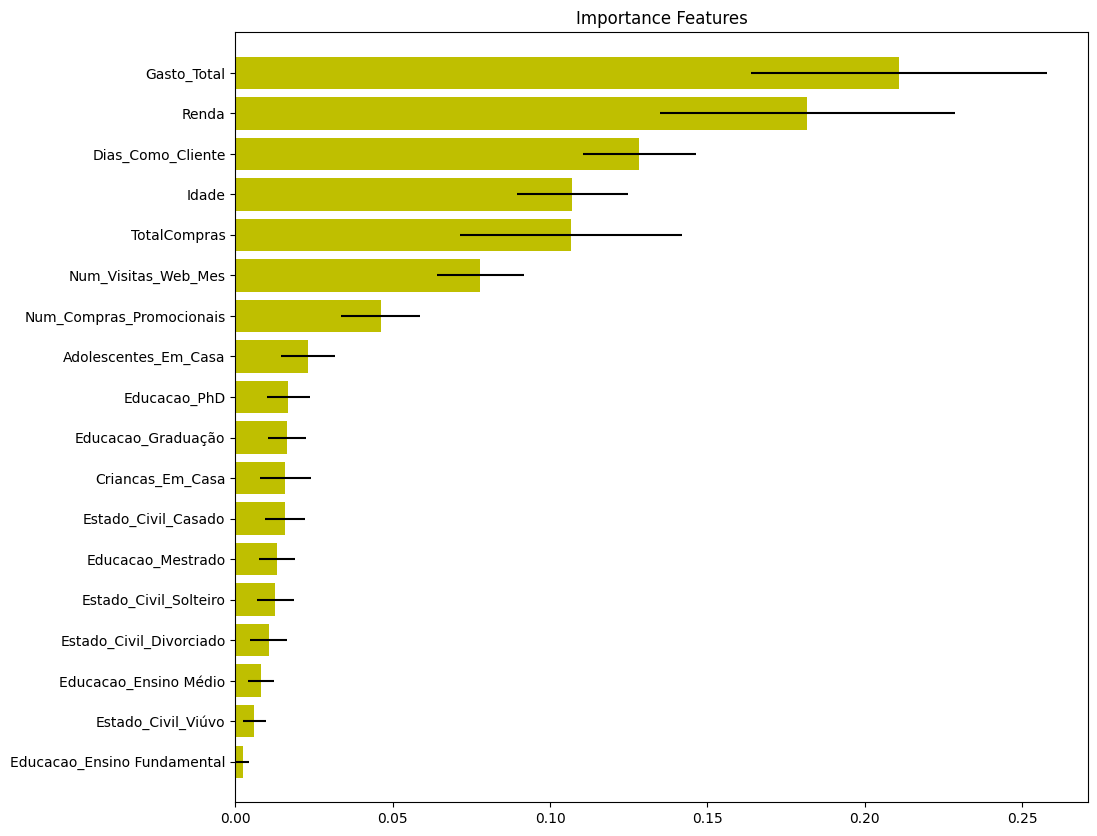

In [26]:
# Plot
plt.figure(1, figsize = (11, 10))
plt.title("Importance Features")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

## Hypothesis Testing

I'll test the hypothesis that there is a significant difference between the average incomes of customers with and without higher education.

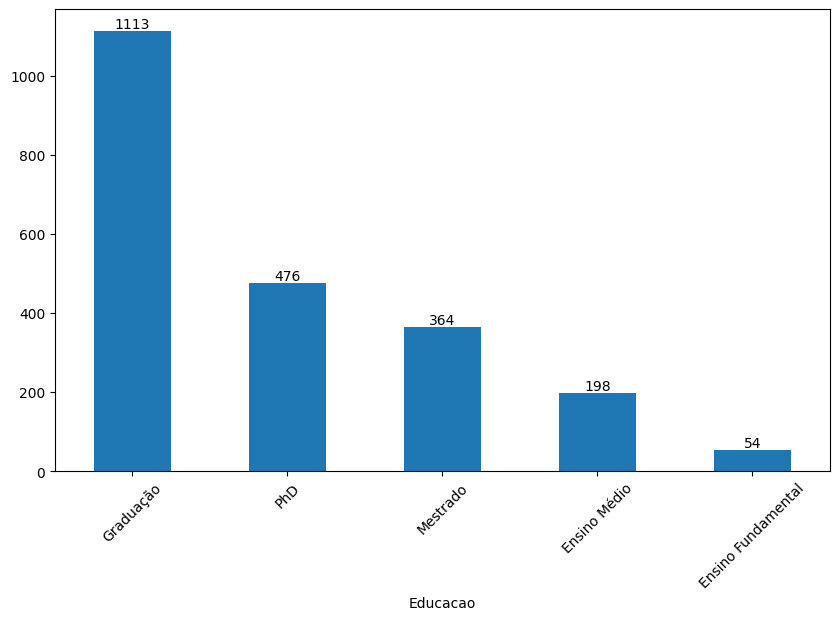

In [27]:
# Plot
plt.figure(figsize = (10, 6))
ax = df.Educacao.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show;

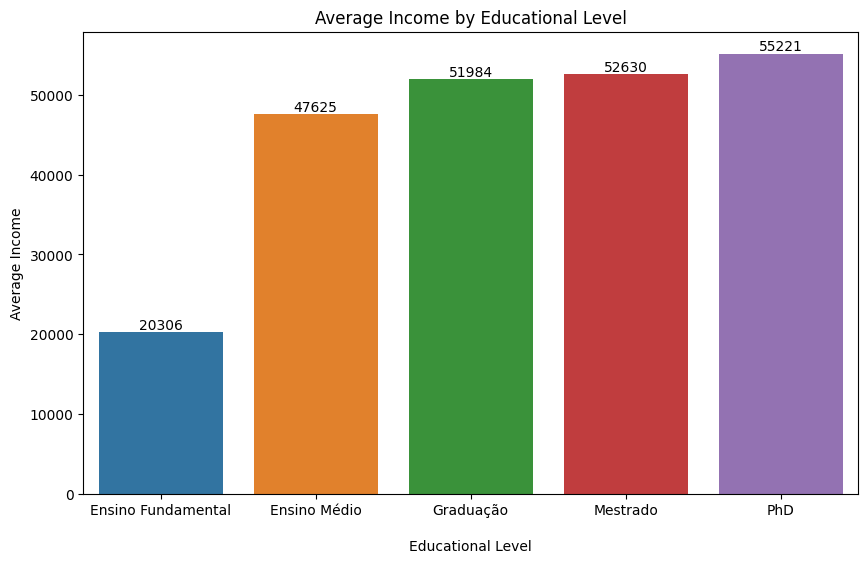

In [28]:
# Mean
media_renda = df.groupby('Educacao')['Renda'].mean().reset_index()
media_renda = media_renda.sort_values(by = 'Renda')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = media_renda['Educacao'], y = media_renda['Renda'], data = df, hue = media_renda['Educacao'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center',
                va = 'bottom')
plt.xlabel('\nEducational Level')
plt.ylabel('Average Income')
plt.title('Average Income by Educational Level')
plt.show()

### Hypothesis

**(H0)**: The null hypothesis is a statement of "no difference." In our case, it states that "There is no significant difference in the mean incomes of groups with and without higher education."

**(H1)**: The alternative hypothesis counters the null hypothesis. It states that "There is a significant difference in the mean incomes of groups with and without higher education."

In [29]:
# Numerical representation
df['Educacao'] = df['Educacao'].map({'Ensino Fundamental':1,
                                             'Ensino Médio':2,
                                             'Graduação':3,
                                             'Mestrado':4,
                                             'PhD':5})

# Data of hypothesis
data_to_test = df[['Renda', 'Educacao']]

# Shapiro-Wilk
def normal_test(columns):

    for column in columns:

        statistic, p_value = shapiro(data_to_test[column])

        alpha = 0.05

        if p_value < alpha:
             print(f'\n{column}: Alpha {alpha} < valor-p {p_value:.2f} - Reject H0.')
        else:
             print(f'\n{column}: Alpha {alpha} > valor-p {p_value:.2f} - Fail to reject H0.')

normal_test(data_to_test)


# Create groups
with_bachelors = df[df['Educacao'].isin([5, 4, 3])]['Renda']
without_bachelors = df[df['Educacao'].isin([1, 2])]['Renda']

# Teste Mann-Whitney U
statistic, p_value = mannwhitneyu(with_bachelors, without_bachelors)

# Significant
alpha = 0.05

# Resultado
if p_value < alpha:
    print("Reject H0: There's a significant difference in income averages.")
else:
    print("Fail to reject H0: There's no significant difference in income means.")


Renda: Alpha 0.05 < valor-p 0.00 - Reject H0.

Educacao: Alpha 0.05 < valor-p 0.00 - Reject H0.
Reject H0: There's a significant difference in income averages.


## Conclusion

The most relevant factors that explain customer response to marketing campaigns are total spending history, income, total time as a customer, age, and total previous purchases.

Education level and marital status do not appear to be relevant factors in explaining response to marketing campaigns.

When testing the hypothesis that there's a significant difference between the average incomes of customers with and without a bachelors degree, it became clear that there's a difference. We also found that higher levels of education have higher average incomes.